## 계층적 클러스터링

In [ ]:
from sklearn.metrics import silhouette_score # 군집 내 거리와 군집간 거리를 비교하는 클러스터 성능 비교 지표

In [ ]:
import pandas as pd
df = pd.read_csv(r'../input/ysp-koreauniv-tutorial/shopping-data.csv')
# 캐글 add data, Mall_customers 검색

In [ ]:
df

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # default 값으로 할 경우 평균 0, 분산 1이 되도록 모든 컬럼을 정규화 스케일링해줌
scaled_data = scaler.fit_transform(df.iloc[:,3:5])# 3번째, 4번째 컬럼에 대해서만 시행(소득, 쇼핑지출)
df.iloc[:,3:5] = scaled_data

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(df.iloc[:,3], df.iloc[:,4])
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#scipy.cluster.hierarchy.linkage

## 1. 유사도 척도(distance(or similarity) metric 정하기)
### 유클리디안 거리, 맨하탄 거리, 마할라노비스 거리, 상관계수 거리, dtw 등

## 2. 두 군집 사이의 거리 측정 방법 정하기 (Min, max, group average, between centroid 등)

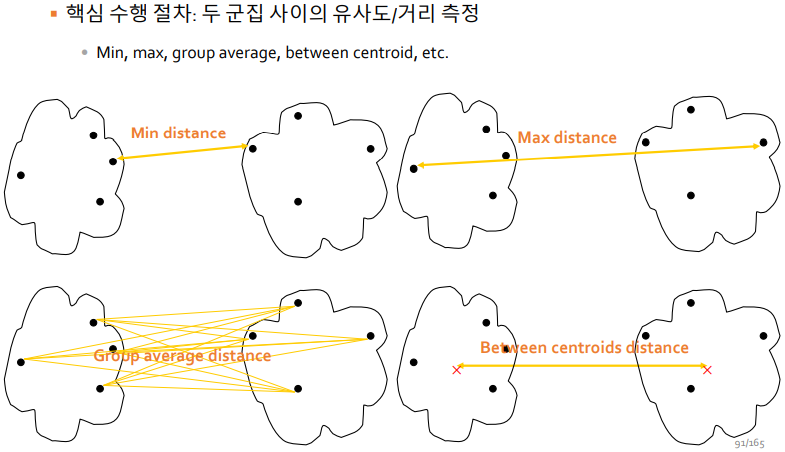

In [ ]:
hiera = linkage(df.iloc[:,3:5]
                , method = 'centroid' # 교재 92p부터 참고 / custom function도 사용 가능
               ) # 계층적 클러스터링 진행하며 모든 거리를 method에 따라 측정

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
dend = dendrogram(hiera, color_threshold=0.7) # linkage 결과에 따라 댄드로그램 시각화

In [ ]:
from scipy.cluster.hierarchy import cut_tree
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cut_tree.html
num_of_cluster = 7
cluster_info = cut_tree(hiera, num_of_cluster) # 설정한 클러스터 개수에 따라 linkage 결과에 대한 군집 결과를 출력
cluster_info

In [ ]:
plt.scatter(df.iloc[:,3], df.iloc[:,4], c = cluster_info, cmap = plt.cm.rainbow)
plt.show()
print('silhouette_score: {}'.format(silhouette_score(df.iloc[:,3:5], cluster_info)))

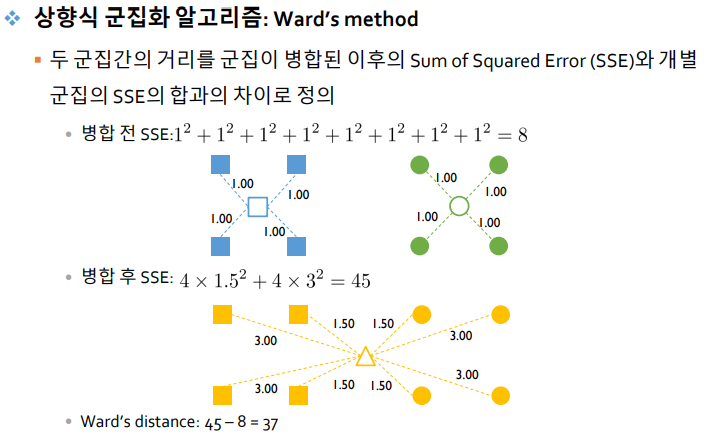

In [ ]:
hiera = linkage(df.iloc[:,3:5], method = 'ward')

dend = dendrogram(hiera)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cut_tree
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cut_tree.html
num_of_cluster = 5
cluster_info = cut_tree(hiera, num_of_cluster)

plt.scatter(df.iloc[:,3], df.iloc[:,4], c = cluster_info, cmap = plt.cm.rainbow)
plt.show()
print('silhouette_score: {}'.format(silhouette_score(df.iloc[:,3:5], cluster_info)))
kmeans = KMeans(n_clusters = 5, random_state = 42)
cluster = kmeans.fit_predict(df.iloc[:,3:5])
plt.scatter(df.iloc[:,3], df.iloc[:,4], c = cluster, cmap = plt.cm.rainbow)
plt.show()
print('silhouette_score: {}'.format(silhouette_score(df.iloc[:,3:5], cluster)))

## K-Means 클러스터링

In [ ]:
from sklearn.cluster import KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
tmp = []
for i in range(1, 11): # for문을 활용해 다양한 클러스터 개수에 대해 클러스터 성능 비교
    kmeans = KMeans(n_clusters = i, init = 'k-means++') # kmeans cluster 모델 정의 (클러스터 개수와 initiation 알고리즘이 중요한데, initiation 알고리즘은 보통 디폴트인 "k-means++"로 하는 것이 좋음)
    kmeans.fit(df.iloc[:,3:5])
    tmp.append(kmeans.inertia_) # inertia를 저장해 inertia를 기준으로 성능 비교

In [ ]:
# 적당한 elbow point는 주관적으로 선택
plt.plot(range(1, 11), tmp)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
cluster = kmeans.fit_predict(df.iloc[:,3:5])
plt.scatter(df.iloc[:,3], df.iloc[:,4], c = cluster, cmap = plt.cm.rainbow)
plt.show()
print('silhouette_score: {}'.format(silhouette_score(df.iloc[:,3:5], cluster)))

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(df.iloc[:,3:5], cluster_info)

In [ ]:
silhouette_score(df.iloc[:,3:5], cluster)